

# Project: No-Show appointments a Dataset From Kaggle 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set I have selected is Medical Appointment No Shows . The reason why I have selected this dataset is becuase as I am working for a healtcare firm, I would like to understand patient behaviour or characteritics behind on why does a patient show up or do not show up for appointment.

The dataset variables are self explanatory and the orginal variables that exist here are 'PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'


In [4]:

# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import pandas as pd
import numpy as np                                                   # for linear algebra
import datetime                                                      # to deal with date and time
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [6]:
# Create the summary report ( Find any anomalies in the data)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Variable Identification

Minimum age is showing -ve (May be an outlier) and max value of age are ranging above 100


First we will identify the predictor and target variable

In [8]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [10]:
#Check missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
#structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [13]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [14]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [15]:
#Check for scheduled day and appointment day  
df[['ScheduledDay','AppointmentDay']].head(5)

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


In [16]:
# # Convert that dateformat which is in string to datetime64[ns]
# The day of the week with Monday=0, Sunday=6

df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['Day_Scheduled'] = df['ScheduledDay'].dt.day
df['weekday_Scheduled'] = df['ScheduledDay'].dt.dayofweek
df['Month_Scheduled'] = df['ScheduledDay'].dt.month


df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['Day_appointed'] = df['AppointmentDay'].dt.day
df['weekday_appointed'] = df['AppointmentDay'].dt.dayofweek
df['Month_appointed'] = df['AppointmentDay'].dt.month

In [17]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4


In [18]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [19]:
df['Month_appointed'].nunique()

3

In [20]:
#Rename the columns which have incorrect spelling mistakes - this will helps us create columns in easy to understand way
df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap':'Handicap', 'No-show' : 'NoShow'}, inplace = True)
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4


In [21]:
# find the unique values for each of the columns specified
print("the unique values for 'Gender' are {}".format(df.Gender.unique()))
print("the unique values for 'Age' are {}".format(sorted(df.Age.unique())))
print("the unique values for 'Neighbourhood' are {}".format(df.Neighbourhood.unique()))
print("the unique values for 'Scholarship' are {}".format(df.Scholarship.unique()))
print("the unique values for 'Hypertension' are {}".format(df.Hypertension.unique()))
print("the unique values for 'Diabetes' are {}".format(df.Diabetes.unique()))
print("the unique values for 'Alcoholism' are {}".format(df.Alcoholism.unique()))

print("the unique values for 'Handicap' are {}".format(df.Handicap.unique()))
print("the unique values for 'SMS_received' are {}".format(df.SMS_received.unique()))
print("the unique values for 'NoShow' are {}".format(df.NoShow.unique()))

the unique values for 'Gender' are ['F' 'M']
the unique values for 'Age' are [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
the unique values for 'Neighbourhood' are ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA

In [22]:
# Check how many records with age < 0 and age > 100
df.query('Age < 0  | Age > 100').count()

PatientId            8
AppointmentID        8
Gender               8
ScheduledDay         8
AppointmentDay       8
Age                  8
Neighbourhood        8
Scholarship          8
Hypertension         8
Diabetes             8
Alcoholism           8
Handicap             8
SMS_received         8
NoShow               8
Day_Scheduled        8
weekday_Scheduled    8
Month_Scheduled      8
Day_appointed        8
weekday_appointed    8
Month_appointed      8
dtype: int64

In [23]:
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
PatientId            110519 non-null float64
AppointmentID        110519 non-null int64
Gender               110519 non-null object
ScheduledDay         110519 non-null datetime64[ns]
AppointmentDay       110519 non-null datetime64[ns]
Age                  110519 non-null int64
Neighbourhood        110519 non-null object
Scholarship          110519 non-null int64
Hypertension         110519 non-null int64
Diabetes             110519 non-null int64
Alcoholism           110519 non-null int64
Handicap             110519 non-null int64
SMS_received         110519 non-null int64
NoShow               110519 non-null object
Day_Scheduled        110519 non-null int64
weekday_Scheduled    110519 non-null int64
Month_Scheduled      110519 non-null int64
Day_appointed        110519 non-null int64
weekday_appointed    110519 non-null int64
Month_appointed      110519 non-null int64
dtypes

In [25]:
#Uniuqe patient counts in the dataset
df.PatientId.nunique()

62294

### Univariate Analysis
We will first look at the target variable, i.e., NoShow. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot. Frequency table of a variable will give us the count of each category in that variable.

In [26]:
df['NoShow'].value_counts()

No     88203
Yes    22316
Name: NoShow, dtype: int64

In [27]:
# Normalise can be set to true to print the proportions instead of Numbers.
df['NoShow'].value_counts(normalize=True)

No     0.79808
Yes    0.20192
Name: NoShow, dtype: float64

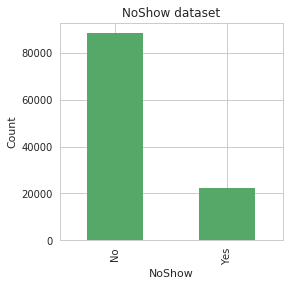

In [28]:
df['NoShow'].value_counts().plot.bar(figsize = (4,4), title = 'NoShow dataset', color = 'g')
plt.xlabel('NoShow')
plt.ylabel('Count');

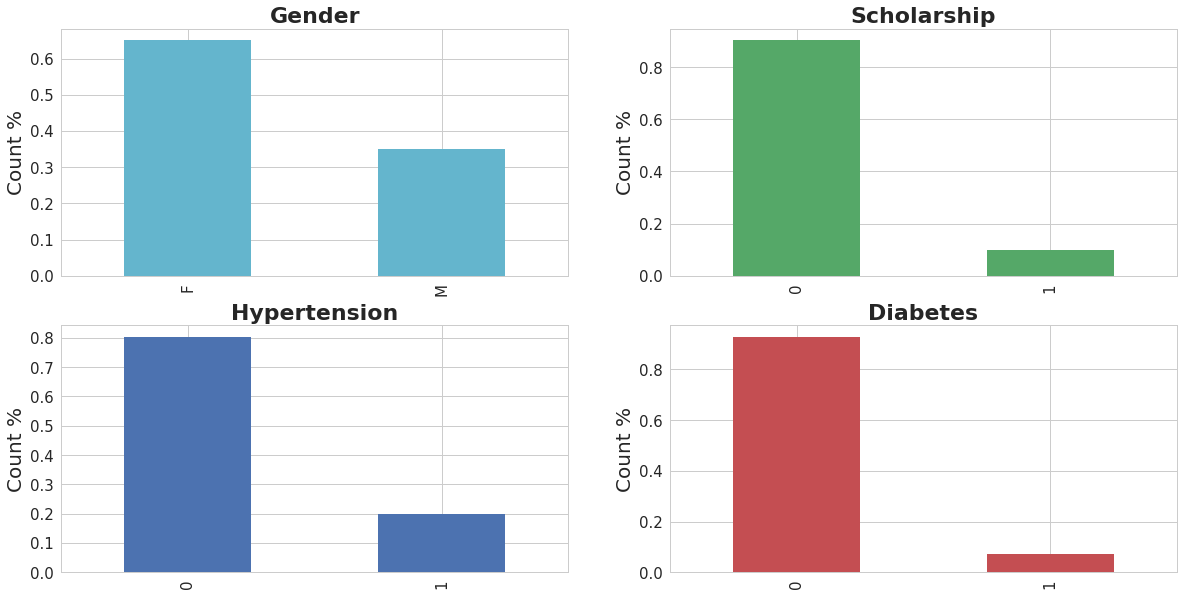

In [29]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes']
#              , 'Alcoholism', 'Handicap']
colour = ['c', 'g', 'b', 'r']
i = 0
for col in iter_cols:    
    plt.subplot(int(str(22)+str((iter_cols.index(col)+1))))
    df[col].value_counts(normalize=True).plot.bar(figsize=(20,10), fontsize = 15.0, color = colour[i])
    plt.title(col, fontweight="bold", fontsize = 22.0)
    plt.ylabel('Count %', fontsize = 20.0)
    i = i +1

# Exploratory Data Analysis
Now I will be answering all the questions mentioned above with my analysis

1. Is there any Gender difference in having a patient to be with status Show / No-Show?

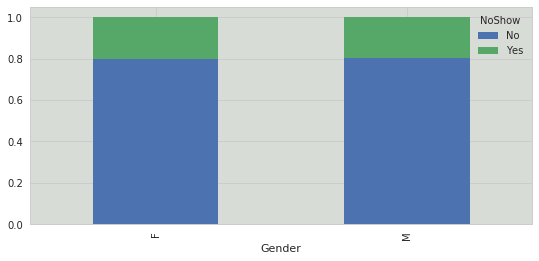

In [30]:
fig, ax = plt.subplots()
Gender=pd.crosstab(df['Gender'],df['NoShow'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax);
ax.set_facecolor('#d8dcd6')

<a id='conclusions'></a>
## Conclusions

1.Of those patients who have showed up for appointment, majority patients with age group from 20 to 40 did not show up for the appointment when compared to age groups 0-20, 40-60 and 60 plus.of these 20 to 40 age group, Female patients are NOT active in getting appointment with doctors when compared to similar age group of Males

2.Majority of the visits or appointments happend on the weeekdays (Monday, Tuesday and Wednesday) when compared to weekends. 

3.Hence weekdays are the best for good conversion for appointment Hypertension and Diabetes patients are attending the doctor when compared to other medications. Age ranges from 40 to 80 - with females conversion is better than Males.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])